<a href="https://colab.research.google.com/github/Dhafanur25/AI_ArrhythmiaChecker/blob/main/KelompokMKD_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import modul yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # modul untuk membuat diagram batang

# **Read Data**



In [ ]:
# masukkan URL ke variable 'file_url'
# Data tersebut merupakan data 'arrhythmia.data'
file_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/arrhythmia/arrhythmia.data'

# baca dengan pd.read_csv() dengan argumen header=None(menandakan tidak ada baris header) dan na_values='?'(semua nilai '?' diubah menjadi NaN)
dataf = pd.read_csv(file_url, header=None, na_values='?')

In [ ]:
# Rename semua column sesuai 'arrhythmia.names'
dataf.set_axis(["Age", "Sex", "Height", "Weight", "QRS Duration", "P-R Interval", "Q-T Interval", "T Interval", "P Interval", "QRS Vector_A", "T Vector_A", "P Vector_A", "QRST Vector_A",
               "J Vector_A", "Heart Rate","Q Wave_W_DI", "R Wave_W_DI", "S Wave_W_DI", "R` Wave_W_DI", "S` Wave_W_DI", "Intrinsic_Deflect_DI", "R_R Wave DI", "D_D_R Wave DI", "R_P Wave DI",
               "D_D_P Wave DI", "R_T Wave DI", "D_D_T Wave DI","Q Wave_W_DII", "R Wave_W_DII", "S Wave_W_DII", "R` Wave_W_DII", "S` Wave_W_DII", "Intrinsic_Deflect_DII", "R_R Wave DII", "D_D_R Wave DII",
               "R_P Wave DII", "D_D_P Wave DII", "R_T Wave DII", "D_D_T Wave DII","Q Wave_W_DIII", "R Wave_W_DIII", "S Wave_W_DIII", "R` Wave_W_DIII", "S` Wave_W_DIII", "Intrinsic_Deflect_DIII",
               "R_R Wave DIII", "D_D_R Wave DIII", "R_P Wave DIII", "D_D_P Wave DIII", "R_T Wave DIII", "D_D_T Wave DIII","Q Wave_W_AVR", "R Wave_W_AVR", "S Wave_W_AVR", "R` Wave_W_AVR", "S` Wave_W_AVR",
               "Intrinsic_Deflect_AVR", "R_R Wave AVR", "D_D_R Wave AVR", "R_P Wave AVR", "D_D_P Wave AVR", "R_T Wave AVR", "D_D_T Wave AVR","Q Wave_W_AVL", "R Wave_W_AVL", "S Wave_W_AVL", "R` Wave_W_AVL",
               "S` Wave_W_AVL", "Intrinsic_Deflect_AVL", "R_R Wave AVL", "D_D_R Wave AVL", "R_P Wave AVL", "D_D_P Wave AVL", "R_T Wave AVL", "D_D_T Wave AVL","Q Wave_W_AVF", "R Wave_W_AVF", "S Wave_W_AVF",
               "R` Wave_W_AVF", "S` Wave_W_AVF", "Intrinsic_Deflect_AVF", "R_R Wave AVF", "D_D_R Wave AVF", "R_P Wave AVF", "D_D_P Wave AVF", "R_T Wave AVF", "D_D_T Wave AVF","Q Wave_W_V1", "R Wave_W_V1",
               "S Wave_W_V1", "R` Wave_W_V1", "S` Wave_W_V1", "Intrinsic_Deflect_V1", "R_R Wave V1", "D_D_R Wave V1", "R_P Wave V1", "D_D_P Wave V1", "R_T Wave V1", "D_D_T Wave V1","Q Wave_W_V2", "R Wave_W_V2",
               "S Wave_W_V2", "R` Wave_W_V2", "S` Wave_W_V2", "Intrinsic_Deflect_V2", "R_R Wave V2", "D_D_R Wave V2", "R_P Wave V2", "D_D_P Wave V2", "R_T Wave V2", "D_D_T Wave V2","Q Wave_W_V3", "R Wave_W_V3",
               "S Wave_W_V3", "R` Wave_W_V3", "S` Wave_W_V3", "Intrinsic_Deflect_V3", "R_R Wave V3", "D_D_R Wave V3", "R_P Wave V3", "D_D_P Wave V3", "R_T Wave V3", "D_D_T Wave V3","Q Wave_W_V4", "R Wave_W_V4",
               "S Wave_W_V4", "R` Wave_W_V4", "S` Wave_W_V4", "Intrinsic_Deflect_V4", "R_R Wave V4", "D_D_R Wave V4", "R_P Wave V4", "D_D_P Wave V4", "R_T Wave V4", "D_D_T Wave V4","Q Wave_W_V5", "R Wave_W_V5",
               "S Wave_W_V5", "R` Wave_W_V5", "S` Wave_W_V5", "Intrinsic_Deflect_V5", "R_R Wave V5", "D_D_R Wave V5", "R_P Wave V5", "D_D_P Wave V5", "R_T Wave V5", "D_D_T Wave V5","Q Wave_W_V6", "R Wave_W_V6",
               "S Wave_W_V6", "R` Wave_W_V6", "S` Wave_W_V6", "Intrinsic_Deflect_V6", "R_R Wave V6", "D_D_R Wave V6", "R_P Wave V6", "D_D_P Wave V6", "R_T Wave V6", "D_D_T Wave V6","JJ Wave_Amp_DI", "Q Wave_Amp_DI",
               "R Wave_Amp_DI", "S Wave_Amp_DI", "R` Wave_Amp_DI", "S` Wave_Amp_DI", "P Wave_Amp_DI", "T Wave_Amp_DI", "QRSA DI", "QRSTA DI","JJ Wave_Amp_DII", "Q Wave_Amp_DII", "R Wave_Amp_DII", "S Wave_Amp_DII",
               "R` Wave_Amp_DII", "S` Wave_Amp_DII", "P Wave_Amp_DII", "T Wave_Amp_DII", "QRSA DII", "QRSTA DII","JJ Wave_Amp_DIII", "Q Wave_Amp_DIII", "R Wave_Amp_DIII", "S Wave_Amp_DIII", "R` Wave_Amp_DIII",
               "S` Wave_Amp_DIII", "P Wave_Amp_DIII", "T Wave_Amp_DIII", "QRSA DIII", "QRSTA DIII","JJ Wave_Amp_AVR", "Q Wave_Amp_AVR", "R Wave_Amp_AVR", "S Wave_Amp_AVR", "R` Wave_Amp_AVR", "S` Wave_Amp_AVR",
               "P Wave_Amp_AVR", "T Wave_Amp_AVR", "QRSA AVR", "QRSTA AVR","JJ Wave_Amp_AVL", "Q Wave_Amp_AVL", "R Wave_Amp_AVL", "S Wave_Amp_AVL", "R` Wave_Amp_AVL", "S` Wave_Amp_AVL", "P Wave_Amp_AVL",
               "T Wave_Amp_AVL", "QRSA AVL", "QRSTA AVL","JJ Wave_Amp_AVF", "Q Wave_Amp_AVF", "R Wave_Amp_AVF", "S Wave_Amp_AVF", "R` Wave_Amp_AVF", "S` Wave_Amp_AVF", "P Wave_Amp_AVF", "T Wave_Amp_AVF", "QRSA AVF",
               "QRSTA AVF","JJ Wave_Amp_V1", "Q Wave_Amp_V1", "R Wave_Amp_V1", "S Wave_Amp_V1", "R` Wave_Amp_V1", "S` Wave_Amp_V1", "P Wave_Amp_V1", "T Wave_Amp_V1", "QRSA V1", "QRSTA V1","JJ Wave_Amp_V2",
               "Q Wave_Amp_V2", "R Wave_Amp_V2", "S Wave_Amp_V2", "R` Wave_Amp_V2", "S` Wave_Amp_V2", "P Wave_Amp_V2", "T Wave_Amp_V2", "QRSA V2", "QRSTA V2","JJ Wave_Amp_V3", "Q Wave_Amp_V3", "R Wave_Amp_V3",
               "S Wave_Amp_V3", "R` Wave_Amp_V3", "S` Wave_Amp_V3", "P Wave_Amp_V3", "T Wave_Amp_V3", "QRSA V3", "QRSTA V3","JJ Wave_Amp_V4", "Q Wave_Amp_V4", "R Wave_Amp_V4", "S Wave_Amp_V4", "R` Wave_Amp_V4",
               "S` Wave_Amp_V4", "P Wave_Amp_V4", "T Wave_Amp_V4", "QRSA V4", "QRSTA V4","JJ Wave_Amp_V5", "Q Wave_Amp_V5", "R Wave_Amp_V5", "S Wave_Amp_V5", "R` Wave_Amp_V5", "S` Wave_Amp_V5", "P Wave_Amp_V5",
               "T Wave_Amp_V5", "QRSA V5", "QRSTA V5","JJ Wave_Amp_V6", "Q Wave_Amp_V6", "R Wave_Amp_V6", "S Wave_Amp_V6", "R` Wave_Amp_V6", "S` Wave_Amp_V6", "P Wave_Amp_V6", "T Wave_Amp_V6", "QRSA V6", "QRSTA V6",
               "Class"], axis = "columns", inplace =True)

<ipython-input-3-6b295a1adeb5>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  dataf.set_axis(["Age", "Sex", "Height", "Weight", "QRS Duration", "P-R Interval", "Q-T Interval", "T Interval", "P Interval", "QRS Vector_A", "T Vector_A", "P Vector_A", "QRST Vector_A",


# **Output Isi Data**

In [ ]:
# output isi dataframe dataf
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# output 5 baris pertama dataf
dataf.head()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


In [ ]:
# output 5 baris terakhir dataf
dataf.tail()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1
451,78,1,160,70,79,127,364,138,78,28,...,0.0,10.4,-1.8,0.0,0.0,0.5,1.6,21.3,32.8,1


In [ ]:
# output informasi dataf termasuk jumlah baris dan kolom, tipe data kolom
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, Age to Class
dtypes: float64(125), int64(155)
memory usage: 988.9 KB


In [ ]:
# output informasi statisk dataf termasuk count, mean, std, min, quartil, dan max
dataf.describe()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,...,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.152655,367.207965,169.949115,90.004425,33.676991,...,-0.278982,9.048009,-1.457301,0.003982,0.0,0.514823,1.222345,19.326106,29.473230,3.880531
std,16.466631,0.497955,37.170340,16.590803,15.364394,44.842283,33.385421,35.633072,25.826643,45.431434,...,0.548876,3.472862,2.002430,0.050118,0.0,0.347531,1.426052,13.503922,18.493927,4.407097
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-4.100000,0.000000,-28.600000,0.000000,0.0,-0.800000,-6.000000,-44.200000,-38.600000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.750000,...,-0.425000,6.600000,-2.100000,0.000000,0.0,0.400000,0.500000,11.450000,17.550000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,0.000000,8.800000,-1.100000,0.000000,0.0,0.500000,1.350000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,384.000000,179.000000,102.000000,66.000000,...,0.000000,11.200000,0.000000,0.000000,0.0,0.700000,2.100000,25.825000,41.125000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,0.000000,23.600000,0.000000,0.800000,0.0,2.400000,6.000000,88.800000,115.900000,16.000000


# **Data Preprocessing**

## **Handle missing values**


Column 'T Vector_A': 8 missing value(s) (1.77%)
Column 'P Vector_A': 22 missing value(s) (4.87%)
Column 'QRST Vector_A': 1 missing value(s) (0.22%)
Column 'J Vector_A': 376 missing value(s) (83.19%)
Column 'Heart Rate': 1 missing value(s) (0.22%)


<ipython-input-9-bce370cdd09b>:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(columns, rotation=90)


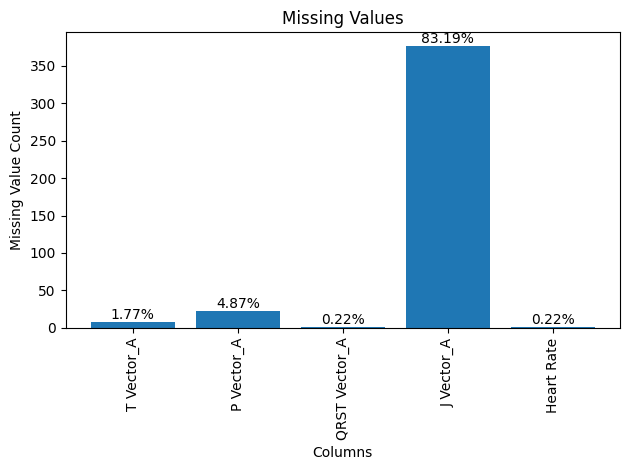

In [ ]:
# function untuk check missing values
def check_missing_values(df):
    missing_values = {}
    total_rows = len(df)

    for column in df.columns:
        missing_count = df[column].isna().sum()
        if missing_count > 0:
            missing_values[column] = missing_count

    # Jika tidak ada missing values pada datagram frame akan keluar dari function
    if len(missing_values) == 0:
        print(f'Tidak ada missing values pada Data Frame ini')
        return

    for column, count in missing_values.items():
        percentage = (count / total_rows) * 100
        print(f"Column '{column}': {count} missing value(s) ({percentage:.2f}%)")

    # buat bar chart
    if len(missing_values) > 0:
        # buat list columns, count missing value(s), dan persen
        columns = list(missing_values.keys())
        counts = list(missing_values.values())
        percentages = [(count / total_rows) * 100 for count in counts]

        # Plot missing value(s) menggunakan bar chart
        fig, ax = plt.subplots()
        ax.bar(columns, counts)

        # tambah label persen
        for i, count in enumerate(counts):
            ax.text(i, count, f"{percentages[i]:.2f}%", ha='center', va='bottom')

        # Set labels dan titles
        ax.set_xlabel('Columns')
        ax.set_ylabel('Missing Value Count')
        ax.set_title('Missing Values')
        ax.set_xticklabels(columns, rotation=90)

        plt.tight_layout()
        plt.show()

# panggil procedure
check_missing_values(dataf)

Dataframe dengan missing value yang lebih dari 80% akan di drop dimana hanya column 'J Vector_A' dengan 376 missing values akan di drop. Untuk column lain dengan data frame yang ada missing value(s) akan diisi dengan nilai mean berdasarkan columnnya.

In [ ]:
# Drop column 'J Vector_A'
dataf = dataf.drop('J Vector_A', axis=1)
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# isi sisa missing values yang ada di dataframe dengan mean values tiap column
mean_values = dataf.mean()
dataf = dataf.fillna(mean_values)
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,Q Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,R` Wave_Amp_V6,S` Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [ ]:
# Cek ulang missing values
check_missing_values(dataf)

Tidak ada missing values pada Data Frame ini


## **Handle data bernilai nol**

In [ ]:
# function hapus column yang data bernilai nol lebih dari threshold
def drop_columns_with_zeros(data, threshold):
    total_rows = len(data)
    zero_values = data[data == 0].count()
    zero_percentages = zero_values / total_rows * 100

    columns_to_drop = zero_percentages[zero_percentages > threshold].index
    data = data.drop(columns_to_drop, axis=1)

    dropped_columns = pd.DataFrame({'Column': columns_to_drop, 'Zero Percentage': zero_percentages[columns_to_drop]})

    print("Dropped Columns:\n")
    print(f"Columns\t\tZero Percantage")
    for _, row in dropped_columns.iterrows():
        print(f"{row['Column']}\t{row['Zero Percentage']:.2f}%")

    return data

In [ ]:
# function hapus rows yang data bernilai nol lebih dari threshold
def drop_rows_with_zeros(data, threshold):
    total_columns = len(data.columns)
    zero_counts = (data == 0).sum(axis=1)
    zero_percentages = zero_counts / total_columns * 100

    rows_to_drop = zero_percentages[zero_percentages > threshold].index
    dropped_rows = data.loc[rows_to_drop]
    data = data.drop(rows_to_drop)

    print("Dropped Rows:\n")
    print(f"Index\t\tZero Percentage")
    for idx, row in dropped_rows.iterrows():
        print(f"{idx}\t\t{zero_percentages.loc[idx]:.2f}%")

    return data

In [ ]:
# set dulu supaya column sex tidak dihapus (karena dijelaskan di 'arrhythmia.names' bahwa sex 0 = male dan 1 = female, jdi tidak boleh dihapus)
dataf['Sex'] = dataf['Sex'].replace(0, 2)

In [ ]:
# panggil function hapus column dengan threshold 50%
dataf = drop_columns_with_zeros(dataf, 50)

Dropped Columns:

Columns		Zero Percantage
Q Wave_W_DI	73.89%
R` Wave_W_DI	99.12%
S` Wave_W_DI	100.00%
R_R Wave DI	99.78%
D_D_R Wave DI	98.89%
R_P Wave DI	98.89%
D_D_P Wave DI	99.56%
R_T Wave DI	99.56%
D_D_T Wave DI	99.12%
Q Wave_W_DII	76.77%
R` Wave_W_DII	97.79%
S` Wave_W_DII	99.56%
R_R Wave DII	98.23%
D_D_R Wave DII	97.12%
R_P Wave DII	99.78%
D_D_P Wave DII	99.56%
R_T Wave DII	99.56%
D_D_T Wave DII	98.45%
Q Wave_W_DIII	55.97%
S Wave_W_DIII	52.88%
R` Wave_W_DIII	92.48%
S` Wave_W_DIII	98.89%
R_R Wave DIII	99.78%
D_D_R Wave DIII	96.46%
R_P Wave DIII	99.78%
D_D_P Wave DIII	98.23%
R_T Wave DIII	98.89%
D_D_T Wave DIII	99.56%
S Wave_W_AVR	83.63%
R` Wave_W_AVR	91.81%
S` Wave_W_AVR	99.78%
R_R Wave AVR	98.89%
D_D_R Wave AVR	99.56%
R_P Wave AVR	99.56%
D_D_P Wave AVR	99.56%
R_T Wave AVR	99.56%
D_D_T Wave AVR	99.12%
Q Wave_W_AVL	66.37%
S Wave_W_AVL	51.11%
R` Wave_W_AVL	97.57%
S` Wave_W_AVL	100.00%
R_R Wave AVL	100.00%
D_D_R Wave AVL	98.23%
R_P Wave AVL	99.78%
D_D_P Wave AVL	99.78%
R_T Wave AVL	99

148 dari 279 column dihapus karena memiliki lebih dari 50% data yang bernilai nol.

In [ ]:
# panggil function hapus baris dengan threshold 30%
dataf = drop_rows_with_zeros(dataf, 30)

Dropped Rows:

Index		Zero Percentage
76		33.59%


1 dari 452 column dihapus karena memiliki lebih dari 30% data yang bernilai nol.

In [ ]:
# set balik column sex
dataf['Sex'] = dataf['Sex'].replace(2, 0)

In [ ]:
# cek hasil data frame setelah data processing
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,75,0,190,80,91,193,371,174,121,-16,...,25.5,62.9,-0.3,9.0,-0.9,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,21.6,43.4,-0.5,8.5,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,11.5,48.2,0.9,9.5,-2.4,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,36.8,68.0,0.1,12.2,-2.2,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,21.7,48.9,-0.4,13.1,-3.6,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,-8.4,-0.6,0.0,4.3,-5.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,50.7,82.5,-0.5,15.6,-1.6,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,-39.6,-63.6,1.2,16.3,-28.6,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,29.7,61.0,0.2,12.0,-0.7,0.5,2.4,25.0,46.6,1


# **Output data setelah preprocessing**

In [ ]:
# output informasi dataf termasuk jumlah baris dan kolom, tipe data kolom
dataf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451 entries, 0 to 451
Columns: 131 entries, Age to Class
dtypes: float64(86), int64(45)
memory usage: 465.1 KB


In [ ]:
# output informasi statisk dataf termasuk count, mean, std, min, quartil, dan max
dataf.describe()

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
count,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,...,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000,451.000000
mean,46.474501,0.552106,166.164080,68.161863,88.909091,155.133038,367.066519,169.975610,90.024390,33.494457,...,17.954545,32.912195,-0.305987,9.068071,-1.460532,0.514634,1.229933,19.387361,29.624169,3.882483
std,16.484771,0.497830,37.208119,16.608243,15.379588,44.890138,33.286634,35.668185,25.851831,45.315652,...,16.282365,24.433385,0.599470,3.450398,2.003473,0.347893,1.418470,13.455905,18.233619,4.411795
min,0.000000,0.000000,105.000000,6.000000,55.000000,0.000000,232.000000,108.000000,0.000000,-172.000000,...,-56.800000,-63.600000,-5.600000,0.000000,-28.600000,-0.800000,-6.000000,-44.200000,-33.200000,1.000000
25%,36.000000,0.000000,160.000000,59.000000,80.000000,142.000000,350.000000,148.000000,79.000000,3.500000,...,8.750000,15.750000,-0.500000,6.600000,-2.100000,0.400000,0.500000,11.500000,17.650000,1.000000
50%,47.000000,1.000000,164.000000,68.000000,86.000000,157.000000,367.000000,162.000000,91.000000,40.000000,...,18.400000,30.400000,-0.200000,8.800000,-1.100000,0.500000,1.400000,18.100000,27.900000,1.000000
75%,58.000000,1.000000,170.000000,79.000000,94.000000,175.000000,383.500000,179.000000,102.000000,66.000000,...,27.900000,48.100000,0.000000,11.200000,0.000000,0.700000,2.100000,25.850000,41.150000,6.000000
max,83.000000,1.000000,780.000000,176.000000,188.000000,524.000000,509.000000,381.000000,205.000000,169.000000,...,82.100000,127.900000,2.700000,23.600000,0.000000,2.400000,6.000000,88.800000,115.900000,16.000000


# **Metode KNN**

In [ ]:
# output ukuran/dimensi dataf
dataf.shape

(451, 131)

In [ ]:
# Shuffle Data
dataf = dataf.sample(len(dataf)).reset_index(drop=True)
dataf

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6,Class
0,51,1,160,80,85,167,355,151,127,36,...,6.4,21.1,0.2,6.4,-1.3,0.6,1.5,12.0,24.0,1
1,48,1,156,62,85,176,385,172,104,78,...,15.6,34.9,0.1,7.5,-1.5,0.7,2.0,10.2,29.0,1
2,56,0,170,80,81,162,352,154,100,23,...,30.8,42.2,0.4,10.0,0.0,0.7,1.0,24.0,32.2,1
3,44,0,179,85,92,240,439,167,123,20,...,9.7,13.5,-0.7,8.2,-1.2,0.4,0.4,14.4,18.2,1
4,41,0,175,97,91,198,402,254,143,-4,...,12.3,28.5,0.0,7.1,-3.3,0.6,1.1,15.0,25.7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,72,0,171,74,77,172,330,140,104,33,...,17.9,21.1,0.0,6.8,0.0,0.7,0.8,25.8,31.4,1
447,49,1,162,54,78,0,376,157,70,67,...,14.5,20.9,-0.3,8.2,-1.9,0.1,0.5,15.8,19.8,1
448,19,0,165,50,96,151,373,147,102,68,...,46.5,6.9,-1.2,15.4,-2.1,0.3,-2.2,32.4,3.4,2
449,79,1,150,60,93,178,361,132,80,44,...,18.6,8.3,-0.8,6.7,0.0,-0.2,-0.9,20.1,13.1,2


In [ ]:
# Melakukan folding pada data
fold_indices = np.arange(len(dataf))
fold_size = len(dataf) // 10  # Menghitung ukuran setiap lipatan

f1 = fold_indices[:fold_size]
f2 = fold_indices[fold_size:2 * fold_size]
f3 = fold_indices[2 * fold_size:3 * fold_size]
f4 = fold_indices[3 * fold_size:4 * fold_size]
f5 = fold_indices[4 * fold_size:5 * fold_size]
f6 = fold_indices[5 * fold_size:6 * fold_size]
f7 = fold_indices[6 * fold_size:7 * fold_size]
f8 = fold_indices[7 * fold_size:8 * fold_size]
f9 = fold_indices[8 * fold_size:9 * fold_size]
f10 = fold_indices[9 * fold_size:]

fold1 = (dataf.iloc[f1].reset_index(drop=True), dataf.iloc[np.concatenate([f2, f3, f4, f5, f6, f7, f8, f9, f10])].reset_index(drop=True))
fold2 = (dataf.iloc[f2].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f3, f4, f5, f6, f7, f8, f9, f10])].reset_index(drop=True))
fold3 = (dataf.iloc[f3].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f4, f5, f6, f7, f8, f9, f10])].reset_index(drop=True))
fold4 = (dataf.iloc[f4].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f3, f5, f6, f7, f8, f9, f10])].reset_index(drop=True))
fold5 = (dataf.iloc[f5].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f3, f4, f6, f7, f8, f9, f10])].reset_index(drop=True))
fold6 = (dataf.iloc[f6].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f3, f4, f5, f7, f8, f9, f10])].reset_index(drop=True))
fold7 = (dataf.iloc[f7].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f3, f4, f5, f6, f8, f9, f10])].reset_index(drop=True))
fold8 = (dataf.iloc[f8].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f3, f4, f5, f6, f7, f9, f10])].reset_index(drop=True))
fold9 = (dataf.iloc[f9].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f3, f4, f5, f6, f7, f8, f10])].reset_index(drop=True))
fold10 = (dataf.iloc[f10].reset_index(drop=True), dataf.iloc[np.concatenate([f1, f2, f3, f4, f5, f6, f7, f8, f9])].reset_index(drop=True))

test, train = fold5
print(train)

     Age  Sex  Height  Weight  QRS Duration  P-R Interval  Q-T Interval  \
0     51    1     160      80            85           167           355   
1     48    1     156      62            85           176           385   
2     56    0     170      80            81           162           352   
3     44    0     179      85            92           240           439   
4     41    0     175      97            91           198           402   
..   ...  ...     ...     ...           ...           ...           ...   
401   72    0     171      74            77           172           330   
402   49    1     162      54            78             0           376   
403   19    0     165      50            96           151           373   
404   79    1     150      60            93           178           361   
405   52    0     165      80            88           202           369   

     T Interval  P Interval  QRS Vector_A  ...  QRSA V5  QRSTA V5  \
0           151         127   

In [ ]:
# Normalizations
# Melakukan normalisasi data dengan min-max normalization
def norm(df):
  df = (df - df.min()) / (df.max() - df.min())
  return df

# Assign fitur dan kelas
x = dataf.drop('Class', axis=1) # Menghapus kolom Class(Karena akan kita gunakan sebagai arrhythmia Class)
y = dataf.Class # Class arrhythmia sebagai kelas

X = norm(x) # Melakukan normalisasi untuk data fitur
X

,Age,Sex,Height,Weight,QRS Duration,P-R Interval,Q-T Interval,T Interval,P Interval,QRS Vector_A,...,T Wave_Amp_V5,QRSA V5,QRSTA V5,JJ Wave_Amp_V6,R Wave_Amp_V6,S Wave_Amp_V6,P Wave_Amp_V6,T Wave_Amp_V6,QRSA V6,QRSTA V6
0,0.614458,1.0,0.081481,0.435294,0.225564,0.318702,0.444043,0.157509,0.619512,0.609971,...,0.511278,0.455004,0.442298,0.698795,0.271186,0.954545,0.43750,0.625000,0.422556,0.383635
1,0.578313,1.0,0.075556,0.329412,0.225564,0.335878,0.552347,0.234432,0.507317,0.733138,...,0.541353,0.521238,0.514360,0.686747,0.317797,0.947552,0.46875,0.666667,0.409023,0.417170
2,0.674699,0.0,0.096296,0.435294,0.195489,0.309160,0.433213,0.168498,0.487805,0.571848,...,0.481203,0.630670,0.552480,0.722892,0.423729,1.000000,0.46875,0.583333,0.512782,0.438632
3,0.530120,0.0,0.109630,0.464706,0.278195,0.458015,0.747292,0.216117,0.600000,0.563050,...,0.406015,0.478762,0.402611,0.590361,0.347458,0.958042,0.37500,0.533333,0.440602,0.344735
4,0.493976,0.0,0.103704,0.535294,0.270677,0.377863,0.613718,0.534799,0.697561,0.492669,...,0.488722,0.497480,0.480940,0.674699,0.300847,0.884615,0.43750,0.591667,0.445113,0.395037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,0.867470,0.0,0.097778,0.400000,0.165414,0.328244,0.353791,0.117216,0.507317,0.601173,...,0.421053,0.537797,0.442298,0.674699,0.288136,1.000000,0.46875,0.566667,0.526316,0.433266
447,0.590361,1.0,0.084444,0.282353,0.172932,0.000000,0.519856,0.179487,0.341463,0.700880,...,0.436090,0.513319,0.441253,0.638554,0.347458,0.933566,0.28125,0.541667,0.451128,0.355466
448,0.228916,0.0,0.088889,0.258824,0.308271,0.288168,0.509025,0.142857,0.497561,0.703812,...,0.150376,0.743701,0.368146,0.530120,0.652542,0.926573,0.34375,0.316667,0.575940,0.245473
449,0.951807,1.0,0.066667,0.317647,0.285714,0.339695,0.465704,0.087912,0.390244,0.633431,...,0.293233,0.542837,0.375457,0.578313,0.283898,1.000000,0.18750,0.425000,0.483459,0.310530


In [ ]:
# Menghitung jarak menggunakan euclidean distance
def euclidean(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

# Euclidean distance dari baris pertama dan kedua
euclidean(X.iloc[0], X.iloc[1])

1.3634160174119005

In [ ]:
# Training KNN
def knn(X_train, y_train, X_test, k): # k sebagai banyaknya neighbors yang ditentukan

  dist = []
  # Menghitung distance dari data training dan data testing
  for row in range(X_train.shape[0]):
    dist.append(euclidean(X_train.iloc[row], X_test))

  data = X_train.copy()
  data['Dist'] = dist     # Menambahkan data distance pada data
  data['Class'] = y_train # Menambahkan class pada data
  data = data.sort_values(by= 'Dist').reset_index(drop=True) # Mengurutkan data berdasarkan distance

  y_pred = data.iloc[:k].Class.mode() # Mengambil label kelas yang paling sering muncul diantara k-NN
  return y_pred[0]


In [ ]:
# Menghitung akurasi dari output berdasarkan label kelas
def acc(y_pred, y_true):
  true = 0
  for i in range(len(y_pred)):
    if y_pred[i] == y_true[i]:
      true += 1
  return true/len(y_pred)

In [ ]:
# Evaluasi model dengan menggunakan data fold
def evaluate(fold, k):
  test, train = fold
  X_train, y_train = train.drop('Class', axis=1), train.Class
  X_test, y_test = test.drop('Class', axis=1), test.Class
  X_train = norm(X_train)
  X_test = norm(X_test)
  y_preds = []
  for row in range(X_test.shape[0]):
    y_preds.append(knn(X_train, y_train, X_test.iloc[row],k))

  return (acc(y_preds, y_test))

Menggunakan k: 16, dengan rata-rata akurasi: 0.6011594202898551



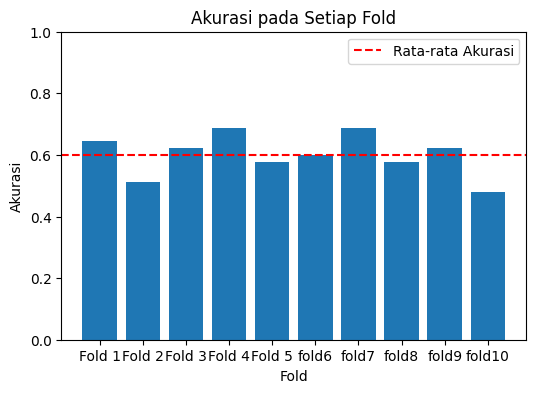

In [ ]:
# Evaluasi hasil setiap fold dan ambil rata-rata akurasi
k = 16
accs = []
folds = [fold1, fold2, fold3, fold4, fold5, fold6, fold7, fold8, fold9, fold10]
for i in range(len(folds)):
  accs.append(evaluate(folds[i], k))

average_accuracy = sum(accs) / 10

print(f'Menggunakan k: {k}, dengan rata-rata akurasi: {average_accuracy}\n')

# visualisasi
plt.figure(figsize=(6, 4))
plt.bar(['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10'], accs)
plt.axhline(average_accuracy, color='r', linestyle='--', label='Rata-rata Akurasi')
plt.xlabel('Fold')
plt.ylabel('Akurasi')
plt.title('Akurasi pada Setiap Fold')
plt.legend()
plt.ylim(0, 1)
plt.show()